## loading data

In [1]:
%matplotlib inline

# data manipulation and math

import numpy as np
import scipy as sp
import pandas as pd
# plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
#preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import os

In [2]:
df = pd.read_csv("../data/wine_df_eda.csv")
df.head()


,Unnamed: 0,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio
0,0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,32.352941,494.736842,23.456790,91.358025
1,2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,27.777778,426.086957,26.869159,91.121495
2,4,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,32.500000,522.222222,22.332506,91.811414
3,5,red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,25.423729,587.500000,18.823529,92.941176
4,7,red,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,50.000000,475.000000,23.866348,93.078759


In [3]:
df.drop(df.columns[[0]], inplace=True, axis=1)
df.head()

,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,32.352941,494.736842,23.456790,91.358025
1,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,27.777778,426.086957,26.869159,91.121495
2,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,32.500000,522.222222,22.332506,91.811414
3,red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,25.423729,587.500000,18.823529,92.941176
4,red,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,50.000000,475.000000,23.866348,93.078759


## Preprocess categorical features

In [4]:
new_df = pd.get_dummies(df,drop_first = True,dtype='int' )
new_df.tail(20)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio,wine_type_white
4779,6.2,0.380,0.42,2.50,0.038,34.0,117.0,0.99132,3.36,0.59,11.600000,7,29.059829,464.000000,37.993921,94.224924,1
4780,5.9,0.540,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.800000,5,14.634146,1100.000000,12.422360,91.614907,1
4781,6.2,0.530,0.02,0.90,0.035,6.0,81.0,0.99234,3.24,0.35,9.500000,4,7.407407,1055.555556,13.372957,92.124814,1
4782,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,40.000000,117.695473,116.714697,95.100865,1
4783,5.0,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.400000,6,28.813559,80.000000,224.450812,95.510984,1
4784,5.5,0.320,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.700000,5,28.846154,823.076923,22.336770,94.501718,1
4785,4.9,0.470,0.17,1.90,0.035,60.0,148.0,0.98964,3.27,0.35,11.500000,6,40.540541,605.263158,35.381750,91.247672,1
4786,6.5,0.330,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.600000,5,39.080460,115.662651,121.522694,95.168375,1
4787,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.550000,6,40.000000,117.901235,116.714697,95.100865,1
4788,6.2,0.410,0.22,1.90,0.023,5.0,56.0,0.98928,3.04,0.79,13.000000,7,8.928571,684.210526,28.744327,93.797277,1


In [5]:
new_df["quality"] = new_df["quality"].apply(lambda x : 1 if x >=7 else 0)
new_df["quality"].value_counts()

quality
0    3859
1     940
Name: count, dtype: int64

## feature selections for modeling

In [6]:
new_df.drop("wine_type_white",axis=1).corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.425804
fixed_acidity_ratio     0.105647
free_SO2_ratio          0.094112
alcohol_surgar_ratio    0.070653
citric_acid             0.070184
pH                      0.050306
sulphates               0.037063
free_sulfur_dioxide     0.012923
fixed_acidity          -0.061539
total_sulfur_dioxide   -0.072286
sugar_acidity_ratio    -0.077254
residual_sugar         -0.084189
volatile_acidity       -0.133418
chlorides              -0.215245
density                -0.314221
Name: quality, dtype: float64

it shows alcohol, fixed_acidity_ration are positivie correlated to quality. Also, in previous EDA, The density vs residual_sugar,density vs chlorides, density vs fixed_acidity, totol_sulfur_dioxide vs residual_sugar, free_sulfur_dioxide vs residual_sugar shows strong positive correlation. Therefore the following features will be selected for furture modeling :"alcohol","fixed_acidity_ratio", "density","residual_sugar", "chlorides","total_sulfur_dioxide"

## Scaling

In [7]:
features = new_df.drop(["quality","wine_type_white"],axis = 1)
y =new_df["quality"]
#Save the X labels 
wine_index = features.index
#Save the column names
wine_columns = features.columns
scaler= MinMaxScaler()
scale_features = scaler.fit_transform(features)


In [8]:
#Create a new dataframe from `scale-X`
X_df = pd.DataFrame(scale_features, columns=wine_columns)
X_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio
0,0.486111,0.810458,0.000000,0.073034,0.443709,0.121951,0.102941,0.690123,0.795699,0.472222,0.231405,0.476617,0.260267,0.057358,0.429111
1,0.541667,0.888889,0.054054,0.095506,0.549669,0.170732,0.176471,0.638476,0.526882,0.597222,0.297521,0.404124,0.220341,0.069046,0.411210
2,0.486111,0.758170,0.000000,0.067416,0.437086,0.146341,0.125000,0.690123,0.795699,0.472222,0.231405,0.478947,0.276252,0.053507,0.463425
3,0.555556,0.679739,0.081081,0.056180,0.397351,0.170732,0.194853,0.599742,0.569892,0.333333,0.231405,0.366825,0.314216,0.041487,0.548930
4,0.541667,0.653595,0.027027,0.078652,0.423841,0.097561,0.044118,0.625565,0.634409,0.486111,0.247934,0.756233,0.248788,0.058761,0.559343


In [9]:
# verify scaling
X_df.mean()

fixed_acidity           0.441815
volatile_acidity        0.324009
citric_acid             0.423683
residual_sugar          0.251555
chlorides               0.280648
free_sulfur_dioxide     0.355675
total_sulfur_dioxide    0.408411
density                 0.462920
pH                      0.487474
sulphates               0.413197
alcohol                 0.424946
free_SO2_ratio          0.402581
alcohol_surgar_ratio    0.211193
sugar_acidity_ratio     0.218728
fixed_acidity_ratio     0.748121
dtype: float64

In [10]:
#X = X_df[["alcohol","fixed_acidity_ratio", "density","residual_sugar", "chlorides","total_sulfur_dioxide"]]
X = X_df

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                y,
                                                test_size = 0.30,
                                                random_state = 123,stratify=y)
X_train.shape, X_test.shape

((3359, 15), (1440, 15))

## resampling

In [12]:
class_counts = new_df["quality"].value_counts()
class_counts

quality
0    3859
1     940
Name: count, dtype: int64

In [13]:
class_percentages = pd.Series([(x / new_df.shape[0]) * 100.00 for x in class_counts])

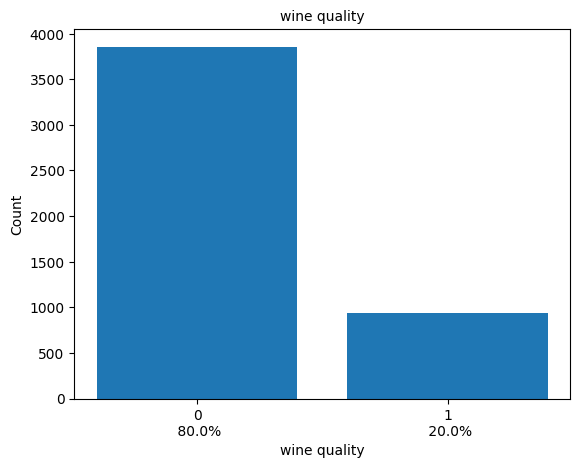

In [14]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([ 0,1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('wine quality')
ax.set_title('wine quality',
              fontsize = 10)
plt.show()

It shows the wine quality data is imbalanced, need to resampling using synthetic minority oversampling technique for data balancing

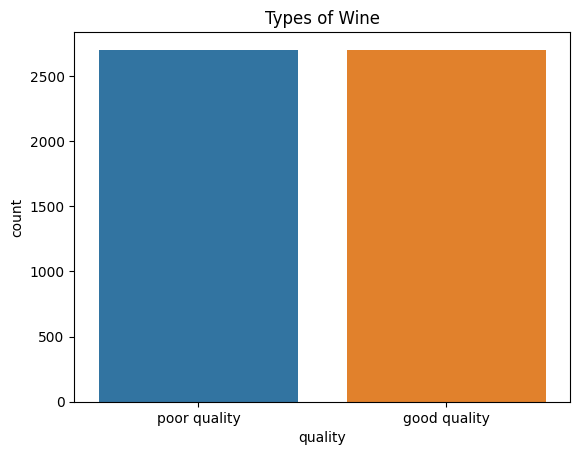

0       0
1       0
2       0
3       0
4       0
       ..
5397    1
5398    1
5399    1
5400    1
5401    1
Name: quality, Length: 5402, dtype: int64

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
oversample = SMOTE(random_state = 40)
X_os, y_os = oversample.fit_resample(X_train, y_train)
sns.countplot(x=y_os)
plt.xticks([0,1], ['poor quality','good quality'])
plt.title("Types of Wine")
plt.show()
X_train = X_os
X_train
y_train = y_os
y_train

## save data for modeling

In [16]:
os.makedirs('../Capstone_Two_Project/data/processed', exist_ok=True) 
X_train.to_csv("../Capstone_Two_Project/data/processed/X_train.csv")

In [17]:
X_test.to_csv("../Capstone_Two_Project/data/processed/X_test.csv")
y_train.to_csv("../Capstone_Two_Project/data/processed/y_train.csv")
y_test.to_csv("../Capstone_Two_Project/data/processed/y_test.csv")
new_df.to_csv("../Capstone_Two_Project/data/processed/df_model.csv")

In [18]:
X_train = pd.read_csv("../Capstone_Two_Project/data/processed/X_train.csv", index_col = 0)
X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio
0,0.361111,0.339869,0.364865,0.123596,0.384106,0.085366,0.139706,0.434474,0.473118,0.472222,0.661157,0.252078,0.221786,0.117228,0.706963
1,0.652778,0.483660,0.418919,0.112360,0.509934,0.243902,0.161765,0.715946,0.645161,0.958333,0.314050,0.629474,0.193985,0.075418,0.706841
2,0.291667,0.235294,0.351351,0.089888,0.172185,0.109756,0.242647,0.152034,0.365591,0.361111,0.685950,0.184057,0.293729,0.097389,0.768827
3,0.500000,0.274510,0.418919,0.469101,0.304636,0.231707,0.533088,0.625565,0.333333,0.444444,0.214876,0.173855,0.032969,0.370546,0.801419
4,0.333333,0.130719,0.297297,0.050562,0.225166,0.536585,0.547794,0.340219,0.451613,0.361111,0.363636,0.424001,0.368013,0.056301,0.872936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,0.249178,0.412962,0.226532,0.168888,0.155060,0.166438,0.411330,0.192282,0.683750,0.872575,0.965475,0.161500,0.213620,0.179840,0.591142
5398,0.242361,0.228478,0.405985,0.047632,0.201372,0.334756,0.363550,0.282578,0.786329,0.311210,0.455136,0.392239,0.410212,0.060853,0.756263
5399,0.388889,0.326797,0.485476,0.338969,0.217057,0.404719,0.405512,0.265978,0.215858,0.125519,0.695451,0.429676,0.079617,0.300229,0.727896
5400,0.459842,0.387228,0.374363,0.341476,0.165753,0.344737,0.361869,0.285378,0.416160,0.508254,0.760331,0.405287,0.082443,0.278961,0.708519


In [19]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio
2562,0.680556,0.339869,0.445946,0.511236,0.178808,0.548780,0.610294,0.612653,0.333333,0.250000,0.363636,0.387747,0.033693,0.340527,0.801632
4629,0.291667,0.209150,0.459459,0.022472,0.178808,0.621951,0.654412,0.249193,0.720430,0.305556,0.570248,0.411779,0.638449,0.031904,0.792077
513,1.000000,0.444444,0.635135,0.115169,0.503311,0.097561,0.102941,0.661717,0.505376,0.763889,0.677686,0.383412,0.238089,0.055805,0.807238
2050,0.375000,0.104575,0.391892,0.067416,0.271523,0.475610,0.518382,0.264041,0.311828,0.305556,0.561983,0.395142,0.340872,0.068217,0.904036
1365,0.361111,0.431373,0.324324,0.752809,0.258278,0.280488,0.393382,0.715946,0.720430,0.430556,0.297521,0.300517,0.013247,0.670992,0.634104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.972222,0.169935,0.662162,0.123596,0.523179,0.121951,0.095588,0.651388,0.483871,0.638889,0.611570,0.508657,0.215555,0.063337,0.940112
1006,0.500000,0.300654,0.554054,0.101124,0.370861,0.402439,0.198529,0.504196,0.612903,0.875000,0.561983,0.861865,0.248788,0.082270,0.782759
3403,0.236111,0.156863,0.891892,0.539326,0.225166,0.939024,0.621324,0.477082,0.225806,0.291667,0.396694,0.670218,0.031835,0.579390,0.822190
3141,0.416667,0.300654,0.432432,0.033708,0.099338,0.231707,0.588235,0.320852,0.301075,0.444444,0.297521,0.154891,0.447496,0.034020,0.757760
